In [1]:
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

import theano
import theano.tensor as T

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
x1 = T.dscalar('x1')
y1 = T.dscalar('y1')
type(x1), type(y1)

(theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

In [3]:
z1 = x1 + y1
u1 = T.exp(z1)

In [4]:
from IPython.display import SVG

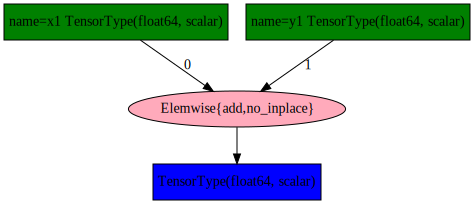

In [5]:
SVG(theano.printing.pydotprint(z1, return_image=True, format='svg'))

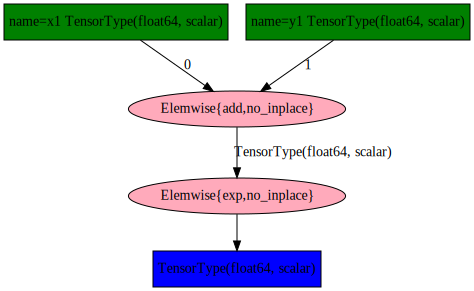

In [6]:
SVG(theano.printing.pydotprint(u1, return_image=True, format='svg'))

In [7]:
X = T.dmatrix('X')
w = T.dvector('w')
b = T.dvector('b')

y = T.dot(X, w) + b
f1 = theano.function([X, w, b], y)


In [8]:
iris = sns.load_dataset("iris")

In [9]:
f1(iris.iloc[:,:-1].values, [1, 2, 1, 2], iris.iloc[:, 1])

array([17.4, 15.7, 16. , 15.8, 17.6, 19.6, 16.8, 17.1, 14.9, 15.9, 18.4,
       17. , 15.4, 14.6, 19.4, 21.2, 19.2, 17.6, 19.4, 18.6, 17.7, 18.5,
       16.8, 17.7, 17.3, 16. , 17.6, 17.6, 17.2, 16.3, 16.1, 17.9, 19.2,
       19.9, 16.1, 16.2, 17.7, 17.3, 15.1, 17.2, 17.4, 13.3, 15.7, 18.3,
       19.2, 15.8, 18.5, 16. , 18.3, 16.7, 24.1, 23.5, 24.1, 19. , 22.5,
       21.2, 24.1, 17.4, 22.5, 20. , 16.5, 22.1, 18.6, 22.3, 20.5, 23.2,
       22.1, 20. , 20.3, 19.2, 23.9, 21.1, 21.7, 21.6, 22. , 22.8, 22.8,
       24.1, 22.2, 19. , 18.7, 18.4, 20.2, 22.4, 21.9, 23.9, 23.7, 20.2,
       21.3, 19.6, 20.1, 22.5, 20. , 17.2, 20.5, 21.3, 21.2, 21.8, 17.8,
       20.8, 27.2, 22.8, 26.2, 24.2, 25.7, 27.4, 20.3, 25.9, 23.6, 29.1,
       25.2, 23.6, 25.5, 22.2, 24.1, 25.9, 24.6, 30.2, 27. , 20.6, 26.8,
       22.9, 26.8, 22.9, 26.5, 26.4, 23. , 23.6, 24.6, 25.2, 25.7, 29.7,
       24.8, 22.8, 22.3, 27.4, 26.9, 24.8, 23.4, 25.8, 26.4, 25.9, 22.8,
       26.9, 27.3, 25.5, 22.6, 24.7, 26.4, 23.6])

In [10]:
s1 = 1 / (1 + T.exp(-x1))
logistic = theano.function([x1], s1)
logistic(1)

array(0.73105858)

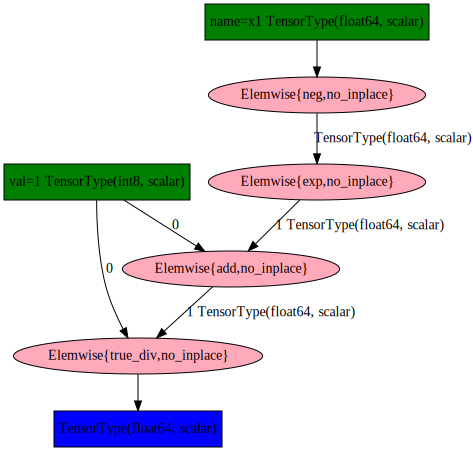

In [11]:
SVG(theano.printing.pydotprint(s1, return_image=True, format='svg'))

### theano.In으로 default값 설정

In [12]:
x1, y1 = T.dscalars('x1', 'y1')
z1 = x1 + y1
f1 = theano.function([theano.In(x1, value=1), theano.In(y1, value=2)], z1)

In [13]:
f1()

array(3.)

update

가중치 업데이트를 할 때 사용.

그래프로 사용이 불가하기 때문.

In [14]:
x1 = T.dscalar('x1')
y1 = T.dscalar('y1')

In [15]:
from theano.tensor.shared_randomstreams import RandomStreams

srng = RandomStreams(0)
rv_u = srng.uniform()
rv_n = srng.normal((2,))

f_rv_u = theano.function([], rv_u)
g_rv_n = theano.function([], rv_n, no_default_updates=True)

w1 = theano.shared(0.0, name="w1")
update = theano.function([x1], y1, givens=[(y1, w1)], updates=[(w1, w1 + x1)])

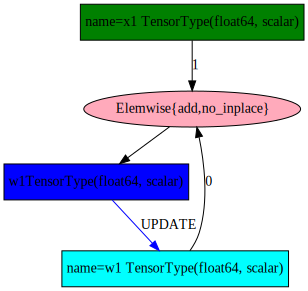

In [16]:
SVG(theano.printing.pydotprint(update, return_image=True, format='svg'))

In [17]:
w1.set_value(f_rv_u())
w1.get_value()

array(0.48604732)

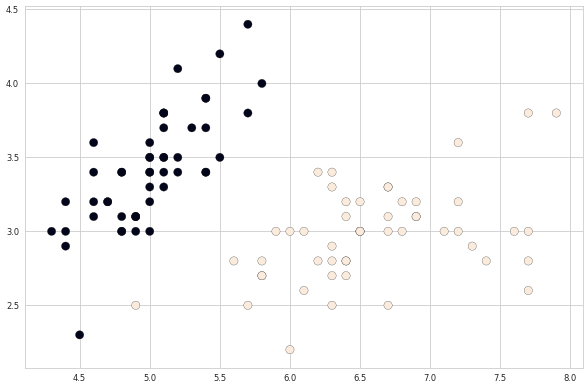

In [18]:
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] - 1

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, edgecolor='k')
plt.show()

In [19]:
X = T.dmatrix('X')
y = T.dvector('y')
np.random.seed(0)
# w, b는 업데이트 해야되서 메모리값으로 넣어줌, +초깃값
w = theano.shared(0.001 * np.random.randn(2), name="w")
b = theano.shared(0.001 * np.random.randn(1)[0], name="b")
a = T.tanh(T.dot(X, w) + b) # y값 1,-1을 받는 하이퍼탄젠트

cost = T.sum(T.maximum(0, -y * a)) # 퍼셉트론 에러

In [20]:
gw, gb = T.grad(cost, [w, b]) # 미분
eta = 0.0000001 # step size / mu 로 쓰기도 함
gradient = theano.function([X, y], cost, updates=[(w, w - eta * gw), (b, b - eta * gb)])

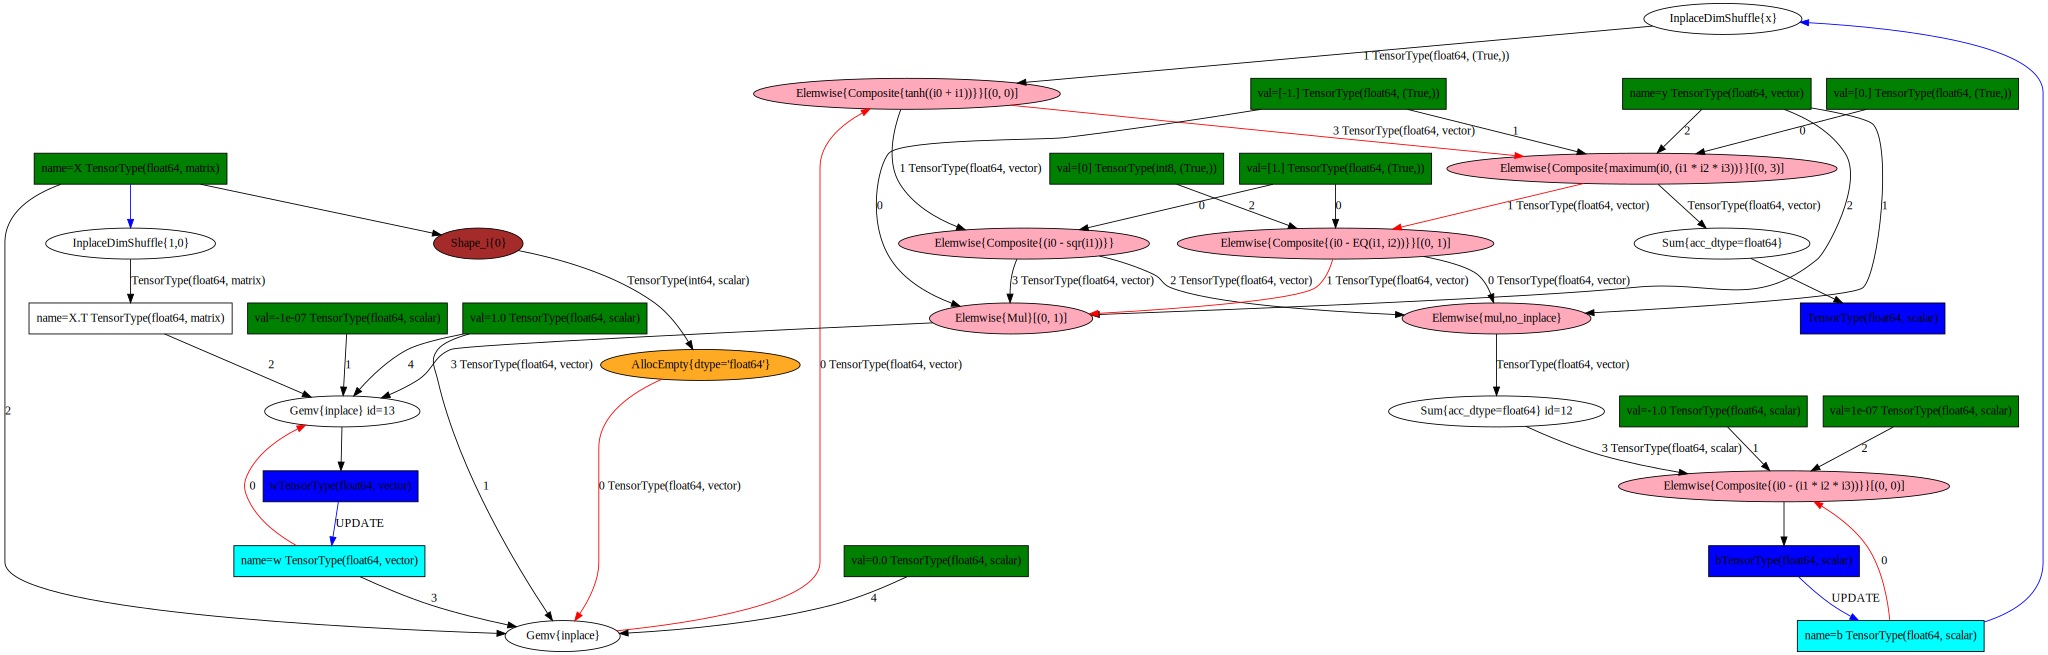

In [21]:
SVG(theano.printing.pydotprint(gradient, return_image=True, format='svg'))

In [22]:
for i in range(100):
    c = gradient(X_data, y_data)
    if i % 10 == 0:
        print(c)

0.5588424928848522
0.4645058718722914
0.37016250114427207
0.2758137467032816
0.18146097498534094
0.0871055527502955
0.0017481157550489357
0.0003194822026270634
0.00029294220762887354
0.0002921062099464409


In [23]:
w.get_value()

array([ 0.00024034, -0.00063639])

In [24]:
b.get_value()

array(0.00067345)

In [25]:
y_pred = T.sgn(a)
y_pred_func = theano.function([X], y_pred)
y_pred = y_pred_func(X_data)
y_pred

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.])

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[49,  1],
       [ 1, 49]])